In [1]:
# Importação das libs
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
# Fonte https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão, sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classes verdadeiras')
    plt.xlabel('Classes classificadas')
    plt.tight_layout()

In [3]:
# Carregando o dataset
dataset = pd.read_csv('creditcardfraud/creditcard.csv')

# Como a coluna time representa somente o tempo entre cada transação, logo é irrelevante
dataset.drop('Time', axis=1, inplace=True)

# Dados desbalanceados

Fraudes: 0.173 %
Não fraudes: 99.827 %
Quantidade de dados:  284806


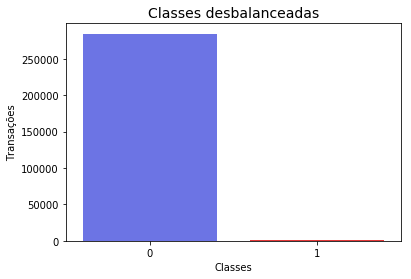

In [7]:
# Como as classes não são equivalentes, devemos montar um dataset com a mesma proporção para as duas classes
colors = ["#5863F8", "#FF1B1C"]

fraudes = dataset[dataset['Class'] == 1]
no_fraudes = dataset[dataset['Class'] == 0]

# Quantidades de exemplos de fraudes
print('Fraudes: {0:.3f}'.format((len(fraudes)/len(dataset))*100), '%')

# Quantidades de exemplos de ñ fraudes
print('Não fraudes: {0:.3f}'.format((len(no_fraudes)/len(dataset))*100), '%')

print('Quantidade de dados: ', dataset.shape[0])

sns.countplot('Class', data=dataset, palette=colors)
plt.title('Classes desbalanceadas', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Transações')
plt.show()

# Realizar o balanceamento dos dados com SMOTE

In [8]:
# Drop na coluna da classe para posteriormente divisão entre dados para treinamento e validação
x_dataset = dataset.drop('Class',axis=1)
y_dataset = dataset.Class

# Iremos aplicar a técnica de SMOTE somente nos dados de treinamento
# Fonte: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

# sampling_strategy = 'minority' -> Significa que será feita a reamostragem na classe minoritária
sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=2)

# Aqui será realizado o processo de criação sintética de novos pontos
x_dataset, y_dataset = sm.fit_sample(x_dataset, y_dataset)

# Dados balanceados

In [ ]:
"""new_dataset = pd.DataFrame(x_dataset)

new_dataset = pd.concat(x_dataset, y_dataset)

sns.countplot('Class', data=y_dataset, palette=colors)
plt.title('Classes balanceadas', fontsize=14)
plt.show()"""

c:\python35\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Matriz de confusão, sem normalização
[[84770   369]
 [    7 85443]]


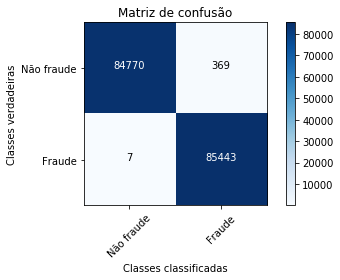

Quantidade de fraudes:  85450
Quantidade de não fraudes:  85139
Quantidade dados treinamento:  398039
Quantidade dados testes:  170589
Acuracidade: 0.9978 %
F1 Score: 0.9978 %
Recall: 0.9999 %


In [9]:
# Dividindo o dataset de forma alearória entre validação e treinamento
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_dataset, y_dataset, train_size = 0.70, random_state=0)

# Usaremos KNN para a classificação, com 5 K Vizinhos, p = 2 para usarmos a distância euclidiana
knn = KNeighborsClassifier(n_neighbors = 5, p = 2).fit(x_train_res, y_train_res)

# Realizando as classficações
y_predict = knn.predict(x_test_res) # x_test vindo de train_test_split

# Criar a matriz de confusão
mc = confusion_matrix(y_test_res, y_predict)

class_names = ['Não fraude', 'Fraude']
plt.figure()
plot_confusion_matrix(mc, classes=class_names, title='Matriz de confusão')
plt.show()

print('Quantidade de fraudes: ', sum(y_test_res == 1))
print('Quantidade de não fraudes: ', sum(y_test_res == 0))

print('Quantidade dados treinamento: ', len(x_train_res))
print('Quantidade dados testes: ', len(x_test_res))

# Metricas
print('Acuracidade: {0:.4f}'.format(accuracy_score(y_test_res, y_predict)), '%')
print('F1 Score: {0:.4f}'.format(f1_score(y_test_res, y_predict)), '%')
print('Recall: {0:.4f}' .format(recall_score(y_test_res, y_predict)), '%')